In [1]:
from desc_dc2_dm_data import REPOS
from lsst.daf.persistence import Butler
import lsst.geom as geom

butler = Butler(REPOS['2.1i'])
skymap = butler.get("deepCoadd_skyMap")

# Near the center of DC2
ra = 65.0  # degrees
dec = -35.0 # degrees

point = geom.SpherePoint(ra, dec, geom.degrees)
tractInfo = skymap.findTract(point)
patchInfo = tractInfo.findPatch(point)

dataId = {
    'tract':tractInfo.getId(), 
    'patch':f"%d,%d"%patchInfo.getIndex(),
    'filter':'r'
}
print(dataId)


{'tract': 4030, 'patch': '1,3', 'filter': 'r'}


In [2]:
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np

# Not sure if all of these are needed.
table = Table()
table['raJ2000'] = np.array([np.deg2rad(65.0)])
table['decJ2000'] = np.array([np.deg2rad(-35.0)])
table['sourceType'] = np.array(["star"])
table['DiskHalfLightRadius'] = np.array([1.0])
table['BulgeHalfLightRadius'] = np.array([1.0])
table['umagVar'] = np.array([23.0])
table['gmagVar'] = np.array([23.0])
table['rmagVar'] = np.array([23.0])
table['imagVar'] = np.array([23.0])
table['zmagVar'] = np.array([23.0])
table['ymagVar'] = np.array([23.0])
table['disk_n'] = np.array([1.0])
table['bulge_n'] = np.array([1.0])
table['a_d'] = np.array([1.0])
table['a_b'] = np.array([1.0])
table['b_d'] = np.array([1.0])
table['b_b'] = np.array([1.0])
table['pa_disk'] = np.array([1.0])
table['pa_bulge'] = np.array([1.0])

table.write("fsi.fits", overwrite=True)

In [7]:
!insertFakes.py \
    /global/cscratch1/sd/desc/DC2/data/Run2.1i/rerun/coadd-dr4-v1/ \
    --output test/ \
    --id tract=4030 patch=1,3 \
    filter=r -c fakeType=fsi.fits \
    --clobber-config --no-versions

CameraMapper INFO: Loading exposure registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/registry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/CALIB/calibRegistry.sqlite3
LsstCamMapper WARN: Unable to find valid calib root directory
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading calib registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading exposure registry from /global/cscratch1/sd/desc/DC2/data/Run2.1i_globus_20200715/w_2019_19-v1/registry.sqlite3
CameraMapp

{'tract': 4030, 'patch': '1,3', 'filter': 'r'}


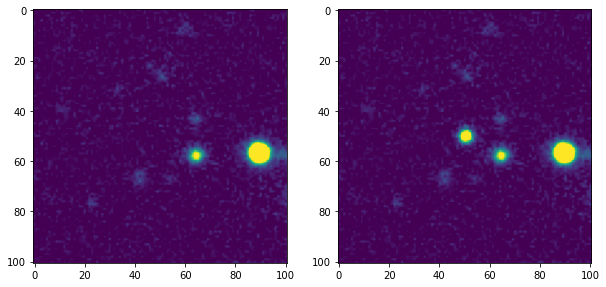

In [6]:
import os
from desc_dc2_dm_data import REPOS
from lsst.daf.persistence import Butler
import lsst.geom as geom

butler = Butler("./test/")

cutoutSize = geom.ExtentI(101, 101)
point = geom.SpherePoint(65.0, -35.0, geom.degrees)

skymap = butler.get("deepCoadd_skyMap")
tractInfo = skymap.findTract(point)
patchInfo = tractInfo.findPatch(point)
xy = geom.PointI(tractInfo.getWcs().skyToPixel(point))
bbox = geom.BoxI(xy - cutoutSize//2, cutoutSize)
coaddId = {
    'tract':tractInfo.getId(), 
    'patch':f"%d,%d"%patchInfo.getIndex(),
    'filter':'r'
}
print(coaddId)

image = butler.get("deepCoadd_sub", bbox=bbox, immediate=True, dataId=coaddId)
fake_image = butler.get("fakes_deepCoadd_sub", bbox=bbox, immediate=True, dataId=coaddId)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(image.maskedImage.image.array, vmin=0, vmax=1)
axes[1].imshow(fake_image.maskedImage.image.array, vmin=0, vmax=1)
plt.show()